# Diabetes (clustering)

다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서
3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

In [1]:
from sklearn import datasets

In [2]:
diabetes=datasets.load_diabetes()

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

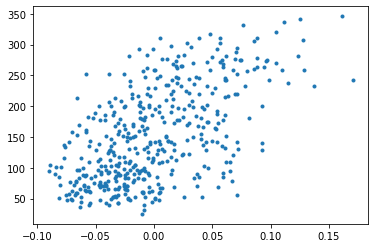

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

# sklearn을 이용하지 않고 (자신의 코드로)

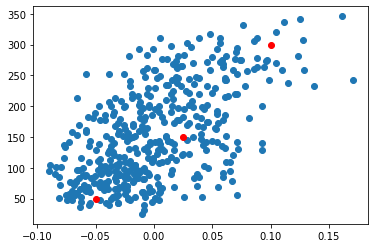

In [21]:
plt.scatter(X_p,X_d)
X = [X_p,X_d]
plt.plot([-0.05],[50],"ro")
plt.plot([0.025],[150],"ro")
plt.plot([0.1],[300],"ro")

In [22]:
temp = []
for (i,j) in zip(X_p,X_d):
    r1=(i+0.05)**2 + (j-50)**2
    r2=(i-0.025)**2 + (j-150)**2
    r3=(i-0.01)**2 + (j-300)**2
    m = min(r1,r2,r3)  
    temp.append([r1,r2,r3].index(m))

In [23]:
x1 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==0)])
x2 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==1)])
x3 = np.transpose([[i,j] for (t,i,j) in zip(temp,X_p,X_d) if(t==2)])
r1 = np.mean(x1[0]),np.mean(x1[1])
r2 = np.mean(x2[0]),np.mean(x2[1])
r3 = np.mean(x3[0]),np.mean(x3[1])

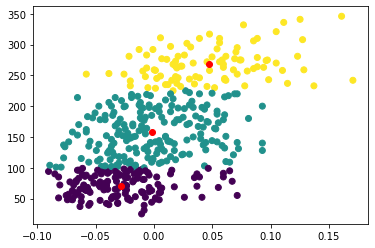

In [24]:
plt.scatter(X_p,X_d,c=temp)
plt.plot(r1[0],r1[1],'ro')
plt.plot(r2[0],r2[1],'ro')
plt.plot(r3[0],r3[1],'ro')

# sklearn을 이용해서

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

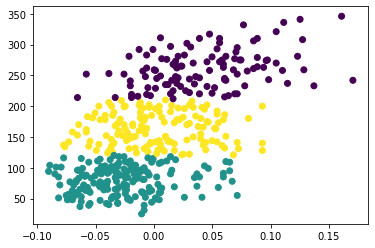

In [27]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

# cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

<Elbow Method>

Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 이 지점의 K 값을 군집의 개수로 사용

inertia_속성으로 확인할 수 있다.

In [40]:
kmeans.inertia_

25055.600675877107

In [41]:
kiner = {}
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

C:\Users\sewon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


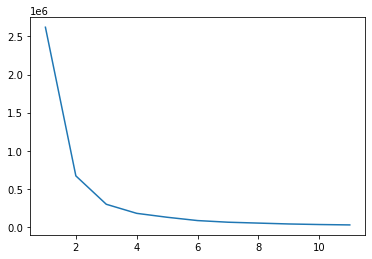

In [42]:
plt.plot(list(kiner.keys()), list(kiner.values()))

In [43]:
#그래프에 따라 k 결정 >> 3

kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

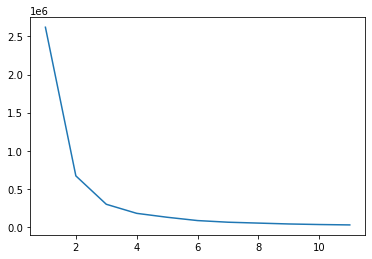

In [44]:
plt.plot(list(kiner.keys()), list(kiner.values()))

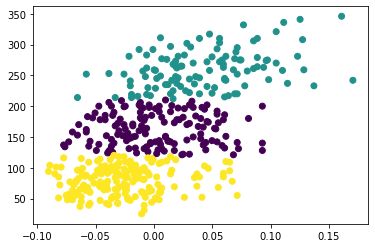

In [46]:
kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)
plt.scatter(X[0],X[1],c=kmeans.labels_)